In [1]:
import pandas as pd
import numpy as np
import re

### Information of each field in books.csv

#### id: unique identifier of the file rows
#### book_id: unique identifier of each book
#### best_book_id: best_book_id is the most popular edition for a given work. Generally it's the same as goodreads_book_id, differs occasionally.
#### work_id: not mentioned
#### books_count: number of editions for a given work
#### isbn: international standard book number
#### isbn13: isbn in 13 digit format
#### authors: authors of the book are comma seperated
#### original_publication_year : the year book was published
#### original_title: title of the book
#### language_code: book language in code
#### average_rating: average rating of the book given by users
#### ratings_count: number of ratings given for the book
#### work_ratings_count: not mentioned
#### work_text_reviews_count: work text reviews count
#### ratings_1, ratings_2,....ratings_5: the number of 1,2,3,4,5 ratings given seperately
#### image_url, small_image_url: URLS for the images of the book

In [2]:
books = pd.read_csv('data/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
books.shape

(10000, 23)

### Information of each field in ratings.csv

#### book_id: unique identifier of the book (common field with book_id in books.csv)
#### user_id: goodreads user id
#### rating: rating given by the user to the book in the range of 1 to 5

In [4]:
user_ratings = pd.read_csv('data/ratings.csv')
user_ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


### Information of each field in tags.csv

#### tag_id: Unique identifier of each tag given to book
#### tag_name: the tag name given by a user to the book

In [5]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


### book_tags.csv contains data regarding the tags given by each user to a book.

### Information of each field in book_tags.csv
#### goodreads_book_id: unique identifier of the book(same as book_id in other files)
#### tag_id: unique tag identifier
#### count: the number of times each tag was given to each book

In [6]:
book_tags = pd.read_csv('book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


### to_read.csv contains information regarding which users marked which books as "to read" on the site. It has the following fields:

#### user_id: unique user identifier
#### book_id: unique book identifier

In [7]:
to_read = pd.read_csv('data/to_read.csv')
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


### As the data is distributed across multiple datasets, we need to combine them to one single dataset before we can start with any EDA.

### There are 3 different data that are seperated: ratings, tags and to read

### What can we do with the ratings data? We could have taken average rating for each book but that data is already present with us in books data. Considering books data as the parent data set. 

### A seperate EDA can be done with the ratings data but nothing is there to be joined from it into our main data set (books data)

### We have tags data which contains tags given by each user to a book. We can analyse which book has got which tag the most number of times and get it into our books data set

In [8]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


### We can see the tag names are very unclean. We need to remove the numerical data and any irrelevant characters from it first

In [9]:
#removing numerical data and special characters
tags['tag_name'] = tags['tag_name'].str.replace('\d+', '')
tags['tag_name'] = tags['tag_name'].str.replace('\W', '')
tags = tags.replace(r'^\s*$', np.nan, regex=True)

In [10]:
tags['tag_name'].value_counts()

s                           50
read                        44
books                       37
book                        21
box                         21
readin                      21
toread                      19
reads                       18
booksread                   17
before                      17
tob                         17
inseries                    17
bookchallenge               15
thcentury                   14
tournamentofbooks           13
challenge                   13
readbefore                  12
summer                      12
bookclub                    12
published                   12
age                         11
booksreadin                 11
readingchallenge            11
caudill                     11
manbooker                   10
thgrade                     10
bestof                      10
readinglist                 10
eng                         10
star                         9
                            ..
oncd                         1
sobit   

In [11]:
tags.head()

,tag_id,tag_name
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


### After retaining only textual data many rows are simply reduced to NaN, so dropping them

In [12]:
tags.dropna(inplace=True)
tags.head()

,tag_id,tag_name
19,19,availableatraspberrys
21,21,calif
22,22,dc
23,23,dean
24,24,england


### Now the mapping of tags and books is in books_tags dataset. Mapping tag name to this data set for further analysis. We already have tag_id mapped

In [13]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [14]:
booktags_joined = pd.merge(book_tags, tags, on="tag_id", how='left')

In [15]:
booktags_joined.head(10)

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,toread
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currentlyreading
4,1,33114,12716,youngadult
5,1,11743,9954,fiction
6,1,14017,7169,harrypotter
7,1,5207,6221,booksiown
8,1,22743,4974,owned
9,1,32989,4364,ya


### Now we have successfully mapped the book id with its tag name given by the users. We need to integrate it with the main book dataset. For each book, there are multiple tags given by different users

In [16]:
booktags_joined['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [17]:
#dropping values with count -1
booktags_joined = booktags_joined[booktags_joined['count'] >= 0]

In [18]:
booktags_joined['count'].describe()

count    999906.000000
mean        208.870892
std        3501.275640
min           1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [19]:
booktags_joined = booktags_joined.sort_values('count', ascending=False)

In [20]:
top_tags = booktags_joined['tag_name'].value_counts()[:20]

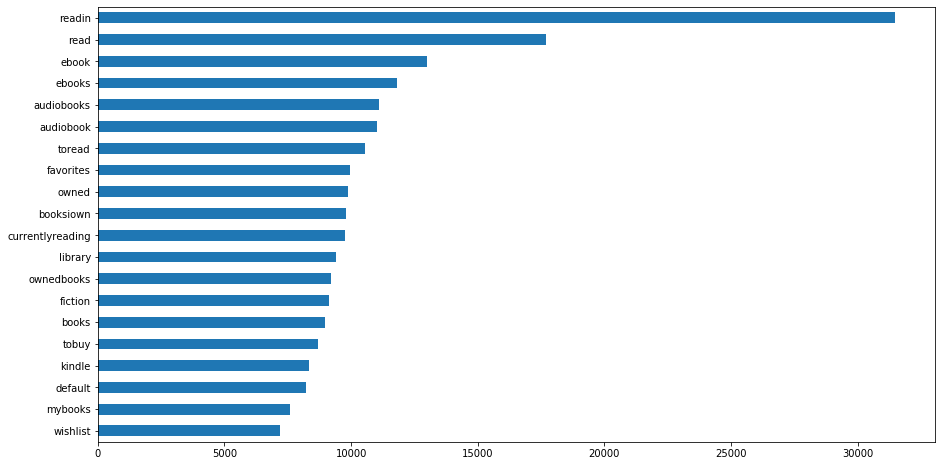

In [41]:
ax = top_tags.plot.barh(x='tag_name', y='count',figsize=(15,8))
ax.invert_yaxis()

### Some of the top tags assigned to books by users

### As a single book has a very large number of tags assigned, it is feasible to only take a certain number of top tags assigned to a book. Hence taking top 20 tags assigned to a book (this number is randomly choosen by me)

In [23]:
df_agg = booktags_joined.groupby(['goodreads_book_id','tag_name']).agg({'count':sum})
g = df_agg['count'].groupby(level=0, group_keys=False)
res = g.nlargest(20)
res

goodreads_book_id  tag_name           
1                  toread                 167697
                   fantasy                 37174
                   favorites               34173
                   currentlyreading        12986
                   youngadult              12716
                   fiction                  9954
                   harrypotter              7169
                   booksiown                6221
                   owned                    4974
                   ya                       4364
                   series                   3857
                   childrens                3503
                   favourites               3456
                   magic                    3374
                   reread                   2679
                   ownedbooks               1881
                   jkrowling                1841
                   adventure                1742
                   children                 1560
                   scififantas

In [24]:
res = res.reset_index()
df = res.groupby('goodreads_book_id')['tag_name'].apply(lambda x: ", ".join(x.astype(str))).reset_index()

In [25]:
df

,goodreads_book_id,tag_name
0,1,"toread, fantasy, favorites, currentlyreading, ..."
1,2,"toread, currentlyreading, fantasy, favorites, ..."
2,3,"toread, favorites, fantasy, currentlyreading, ..."
3,5,"favorites, fantasy, currentlyreading, youngadu..."
4,6,"fantasy, youngadult, fiction, harrypotter, own..."
5,8,"toread, favorites, fantasy, currentlyreading, ..."
6,10,"toread, favorites, fantasy, currentlyreading, ..."
7,11,"toread, currentlyreading, scifi, sciencefictio..."
8,13,"toread, currentlyreading, favorites, scifi, sc..."
9,21,"toread, currentlyreading, history, nonfiction,..."


### Now the tag names are comma separated against  book ids. We can merge this column to our main books data-set

In [26]:
books = pd.merge(books, df, how='left', left_on='book_id', right_on='goodreads_book_id')

In [27]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,"favorites, currentlyreading, youngadult, ficti..."
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,3,"toread, favorites, fantasy, currentlyreading, ..."
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,41865,"youngadult, fantasy, favorites, vampires, ya, ..."
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,2657,"classics, favorites, toread, classic, historic..."
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,4671,"classics, favorites, fiction, classic, booksio..."


In [28]:
books['tag_name'][100]

'toread, nonfiction, humor, favorites, memoir, essays, shortstories, memoirs, fiction, comedy, funny, biography, humour, booksiown, owned, bookclub, audiobooks, audiobook, biographymemoir, audio'

### We have a different dataframe for books marked as "to read" by different users. We need to integrate this also into our main data set

In [29]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [30]:
toread_counts = to_read['book_id'].value_counts().rename_axis('book_id').reset_index(name='toread_count')
toread_counts.head()

,book_id,toread_count
0,47,2772
1,143,1967
2,113,1840
3,13,1812
4,11,1767


In [31]:
books = pd.merge(books, toread_counts, how='left', on='book_id')

In [32]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_name,toread_count
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,"favorites, currentlyreading, youngadult, ficti...",NaN
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,3,"toread, favorites, fantasy, currentlyreading, ...",287.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,41865,"youngadult, fantasy, favorites, vampires, ya, ...",NaN
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,2657,"classics, favorites, toread, classic, historic...",50.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,4671,"classics, favorites, fiction, classic, booksio...",48.0


In [33]:
books['toread_count'].fillna(0, inplace=True)
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_name,toread_count
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,"favorites, currentlyreading, youngadult, ficti...",0.0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,3,"toread, favorites, fantasy, currentlyreading, ...",287.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,41865,"youngadult, fantasy, favorites, vampires, ya, ...",0.0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,2657,"classics, favorites, toread, classic, historic...",50.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,4671,"classics, favorites, fiction, classic, booksio...",48.0


In [34]:
books.drop(['goodreads_book_id'], axis=1, inplace=True)

In [35]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,toread_count
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"favorites, currentlyreading, youngadult, ficti...",0.0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"toread, favorites, fantasy, currentlyreading, ...",287.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"youngadult, fantasy, favorites, vampires, ya, ...",0.0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"classics, favorites, toread, classic, historic...",50.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"classics, favorites, fiction, classic, booksio...",48.0


### We have integrated to reads count and top 20 tags for each book in our main books dataframe. This will be easier for our further analysis.

### We have a tag name as "currentlyreading" with which we can find the number of users who are currently reading the book by getting the count of users who marked the book with this tag

In [36]:
booktags_joined = booktags_joined[booktags_joined['tag_name'] == 'currentlyreading']
booktags_joined.drop(['tag_id', 'tag_name'], axis=1, inplace=True)

In [37]:
books = pd.merge(books, booktags_joined, how='left', left_on='book_id', right_on='goodreads_book_id')

In [38]:
books.rename(columns={'count':'currently_reading'}, inplace=True)

In [39]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,toread_count,goodreads_book_id,currently_reading
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"favorites, currentlyreading, youngadult, ficti...",0.0,2767052.0,35418.0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"toread, favorites, fantasy, currentlyreading, ...",287.0,3.0,44640.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"youngadult, fantasy, favorites, vampires, ya, ...",0.0,41865.0,240.0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"classics, favorites, toread, classic, historic...",50.0,2657.0,1997.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"classics, favorites, fiction, classic, booksio...",48.0,4671.0,313.0


In [42]:
books.drop('goodreads_book_id', axis=1, inplace=True)

In [43]:
books.to_csv('data/books_updated.csv', index=False)

In [44]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,toread_count,currently_reading
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"favorites, currentlyreading, youngadult, ficti...",0.0,35418.0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"toread, favorites, fantasy, currentlyreading, ...",287.0,44640.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"youngadult, fantasy, favorites, vampires, ya, ...",0.0,240.0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"classics, favorites, toread, classic, historic...",50.0,1997.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"classics, favorites, fiction, classic, booksio...",48.0,313.0
